# Sunspots

© Dimitrios Theodorakis GNU General Public License v3.0 https://github.com/DimitriosAstro/Astronomy

**Note** - Some of the code will take up to a minute to run. Be patient!

In [1]:
import numpy as np
from math import degrees
from IPython.display import Image
import sunpy.map
from sunpy.net import Fido, attrs as a
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import astropy.units as u
from astropy.utils.exceptions import AstropyWarning
import warnings
warnings.simplefilter('ignore', category=AstropyWarning)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib notebook
plt.ioff()

### AIM - To measure the sun's rotation period using sunspots and visualise our results

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) How fast do you think the sun rotates?  
2) Does it rotate at the same speed all over its surface?  
3) How could we use sunpots in a series of images to calculate the sun's rotation period?

## Let's go:

In this notebook we are going to look at sunspots and use them to measure the rotation period for the sun. To do this we will need images of the photosphere which we can get using SunPy. We need HMI continuum images and the code below selects twelve to download for use to use. The images are each twelve hours apart.

In [2]:
results = Fido.search(a.Time('2015/05/05 12:00', '2015/05/11 12:00'),a.Instrument('HMI'),
                      a.vso.Sample(0.5*u.day),a.vso.Physobs("intensity"))
files = Fido.fetch(results, path="./images/")

# sort the file names alphabetically using the python function sorted
# Your code here:
files = sorted(files)

results

<sunpy.net.fido_factory.UnifiedResponse object at 0x000002495D4573C8>
Results from 1 Provider:

12 Results from the VSOClient:
   Start Time [1]       End Time [1]    Source ...   Type    Wavelength [2] 
                                               ...              Angstrom    
       str19               str19         str3  ...   str8       float64     
------------------- ------------------- ------ ... -------- ----------------
2015-05-08 00:00:37 2015-05-08 00:00:38    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-05 12:00:36 2015-05-05 12:00:37    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-09 12:00:37 2015-05-09 12:00:38    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-11 00:00:37 2015-05-11 00:00:38    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-10 00:00:37 2015-05-10 00:00:38    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-06 00:00:36 2015-05-06 00:00:37    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-10 12:00:37 2015-05-10 12:00:38    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-07 12:00:37 2015-05-07 12:00:38    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-08 12:00:37 2015-05-08 12:00:38    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-06 12:00:36 2015-05-06 12:00:37    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-09 00:00:37 2015-05-09 00:00:38    SDO ... FULLDISK 6173.0 .. 6174.0
2015-05-07 00:00:36 2015-05-07 00:00:37    SDO ... FULLDISK 6173.0 .. 6174.0

Now we have twelve images of the sun from the HMI instrument on the SDO (Solar Dynamics Observatory) telescope to use. Let's look at the first image using matplotlib's ```imshow()```:

<IPython.core.display.Javascript object>


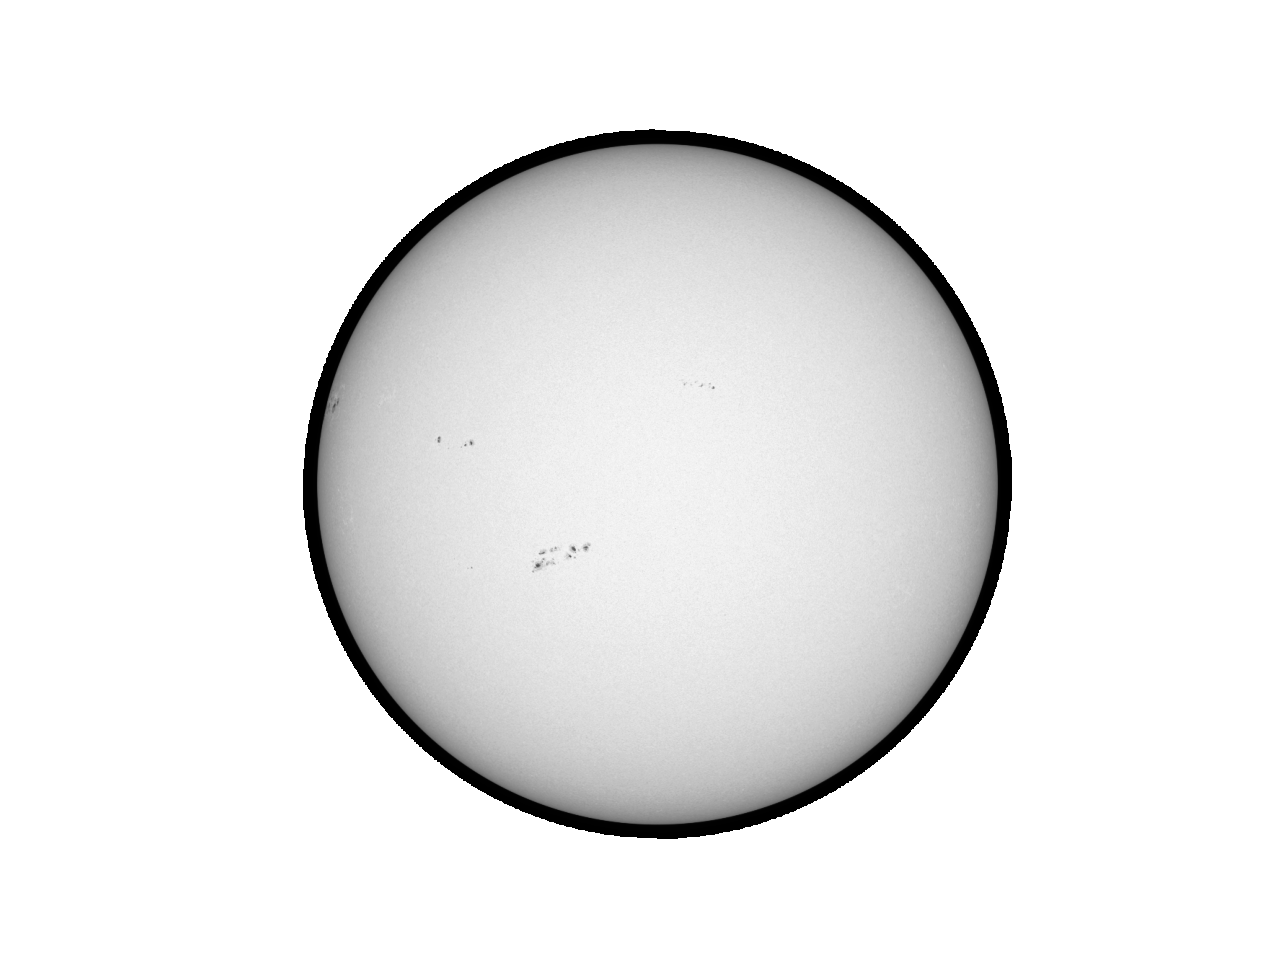

In [3]:
# load a sunpy Map from the first file in files (remember python indexes start at 0)
# Hint: Use sunpy.map.Map()
# Your code here:
smap = sunpy.map.Map(files[0])

smap = smap.resample((1024, 1024) * u.pix)
smap = smap.rotate(order=3)
fig = plt.imshow(smap.data, cmap='Greys_r', origin='lower')
plt.axis('off')
plt.show()

Wow! You should now have an interactive image of the sun. Notice we shrunk the image by a factor of 4 using resample and rotated it so it looks like the view from Earth. Sunspots are dynamic objects which change in size and shape. Lets load an animation of sun from the images we downloaded. You can see that some sunspots last longer than others and they all have a unique shape. The amount of sunspots varies with the 11 year solar cycle which we saw in the Solar Images notebook.

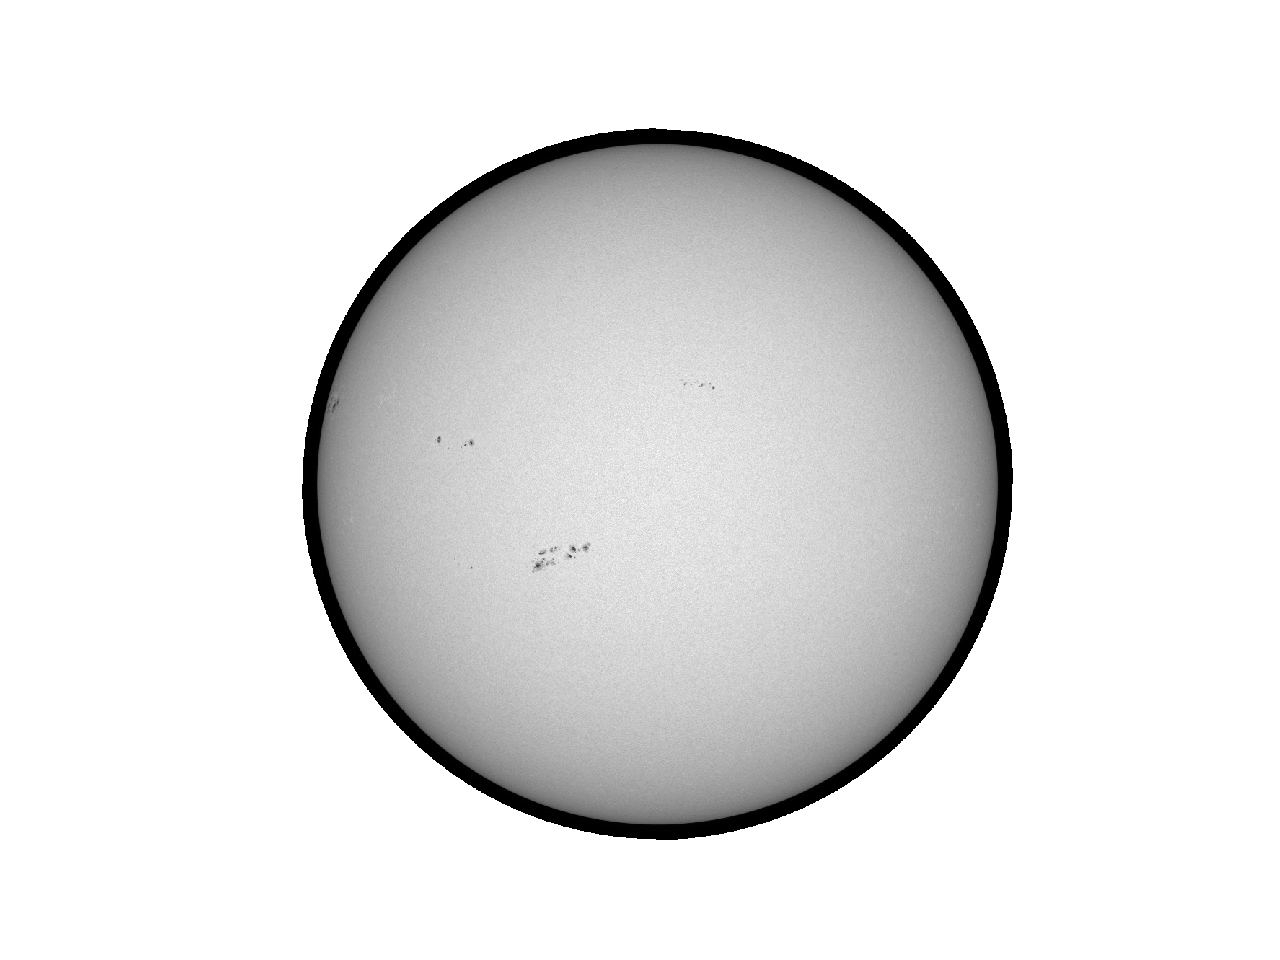

In [4]:
Image('./figures/sunspots.gif')

By tracking the motion of sunspots over the surface of the sun we can work out the sun's rotation period. To do this we need the x and y positions of a few sunspots. The widget below will let you cycle through the set of images we download and make interactive plots of them. Find three sunspots that persist for at least 6 images. Hover over the first sunspot in the first image you chose and put the x and y coordinate into the numpy array ```sunspot1``` below. Do the same for the other sunspots (put their coordinates into ```sunspot2``` and ```sunspot3``` respectively). Move to the next image and find the same sunspots. Again hover over the image and add the new x and y positions to the correct numpy array.

In [5]:
# will take a minute
smaps = [((sunpy.map.Map(file)).resample((1024, 1024) * u.pix)).rotate(order=3) for file in files]

In [6]:
def map_gen(i):
    fig = plt.imshow(smaps[i-1].data, cmap='Greys_r', origin='lower')
    plt.axis('off')
    plt.show()
    
interactive_map = interactive(map_gen, i=widgets.ToggleButtons(
    options=[1,2,3,4,5,6,7,8,9,10,11,12],
    value=1, description='File:', disabled=False)) 
interactive_map

interactive(children=(ToggleButtons(description='File:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), valu…

In [7]:
# your full arrays should look like this:
# sunspot = np.array([[399 , 422],[453 , 424],[506 , 425],[559 , 424],[613 , 421],[666 , 419]])
# Your code here:
sunspot1 = np.array([[257 , 570],[307 , 573],[358 , 574],[411 , 575],[465 , 574],[520 , 575]])
sunspot2 = np.array([[172 , 628],[210 , 629],[251 , 630],[296 , 631],[343 , 632],[393 , 633]])
sunspot3 = np.array([[399 , 422],[453 , 424],[506 , 425],[559 , 424],[613 , 421],[666 , 419]])
sunspots = [sunspot1, sunspot2, sunspot3]

Now you have the pixel positions of three sunspots from your images you can work out the rotation period of the sun! You'll need to know some maths first!  

The motion of a sunspot across the face of the sun is shown in the image below. If you plot the displacement of the sunspot's x coordinate from the centre of the sun against time you get a sine curve! The realtionship between the x displacement and time is:

$$x = A sin(\frac{2\pi}{T}t)$$

where A is the maximum displacement of a sunspot at that solar latitude from the centre of the disk, and T is the rotation period. This maths is visualised further in the theorySunspots notebook.

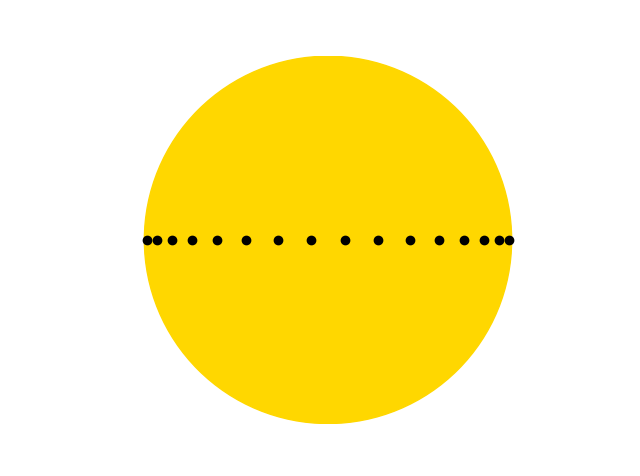

In [8]:
Image('./figures/theorySunspotsPath.png')

If we re-arrange our equation to get $T$ out of the sin we get:

$$arcsin(x/A) = \frac{2\pi}{T}t$$

By plotting $arcsin(x/A)$ against $t$ we can find the gradient $m$ which is equal to $\frac{2\pi}{T}$. Rearranging this gives us:

$$T = \frac{2\pi}{m}$$

Before we do the calculation we need A for each sunspot. We can get the average y value for each sunspot like this:

In [9]:
y_avg = [np.mean(sunspot[:,1]) for sunspot in sunspots]
# y_avg returned some decimals but pixel positions are integers - turn the y_avg values into integers below
# Your code here:
np.floor(y_avg)

array([573., 630., 422.])

For each ```y_avg``` value go to any of the interactive images above and hover until you find that y value. Move to the right edge of the disk and read off the x value (make sure the y value hasn't changed). Put this in the array ```A``` below.

In [10]:
# Here we take 512 off these x positions to get the max displacement A from the centre of the sun
A = np.array([ 982, 971, 977])-512
A

array([470, 459, 465])

Before we do our calculation and plot we have to remember we want the displacement in x and y from the centre of the sun. We have read off the pixel coordinates from our images. To get the displacements we need to take half the image width off the x and y positions.

In [11]:
# calculate the displacements in x and y by subtracting 512 from each x and y sunspot array
# Your code here:
sunspots_disp = [sunspot - 512 for sunspot in sunspots]

sunspots_disp

[array([[-255,   58],
        [-205,   61],
        [-154,   62],
        [-101,   63],
        [ -47,   62],
        [   8,   63]]),
 array([[-340,  116],
        [-302,  117],
        [-261,  118],
        [-216,  119],
        [-169,  120],
        [-119,  121]]),
 array([[-113,  -90],
        [ -59,  -88],
        [  -6,  -87],
        [  47,  -88],
        [ 101,  -91],
        [ 154,  -93]])]

Now we can calculate the $arcsin(x/A)$ and make our first plot of $arcsin(x/A)$ vs $t$.

In [12]:
arcsinxA = [np.arcsin(sunspots_disp[i][:,0]/A[i]) for i in range(len(sunspots))]

# create an array of times from 0 to 60 hours with the same number of points (6) as arcsinxA
# Your code here:
t = np.linspace(0, 5, 6)*12

<IPython.core.display.Javascript object>


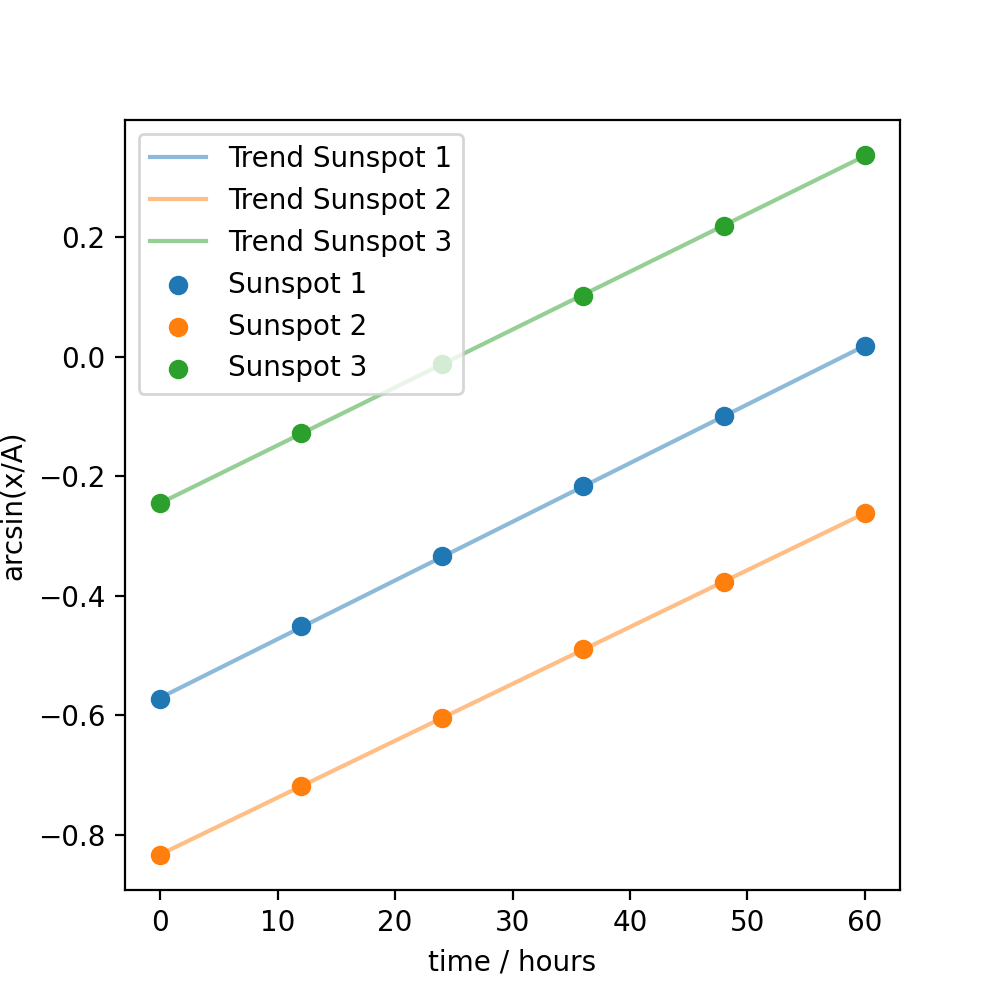

In [13]:
fig1 = plt.figure(num=1, figsize=(5, 5))
ax1 = fig1.add_subplot(111)
ax1.scatter(t, arcsinxA[0], label='Sunspot 1')
ax1.scatter(t, arcsinxA[1], label='Sunspot 2')
ax1.scatter(t, arcsinxA[2], label='Sunspot 3')
ax1.set_xlabel('time / hours')
ax1.set_ylabel('arcsin(x/A)')
plt.show()

Awesome. Let's add a trendline to our graph and use it to calculate the gradients. To do this we will use the ```np.polyfit()``` function.

In [14]:
fits = [np.polyfit(t, y, 1) for y in arcsinxA]
fits

[array([ 0.00981722, -0.57091091]),
 array([ 0.00951801, -0.8332703 ]),
 array([ 0.00968524, -0.24519755])]

Here the first value is the gradient and the second value is the intercept of the straight line fit. We can add them to our plot like this:

<IPython.core.display.Javascript object>


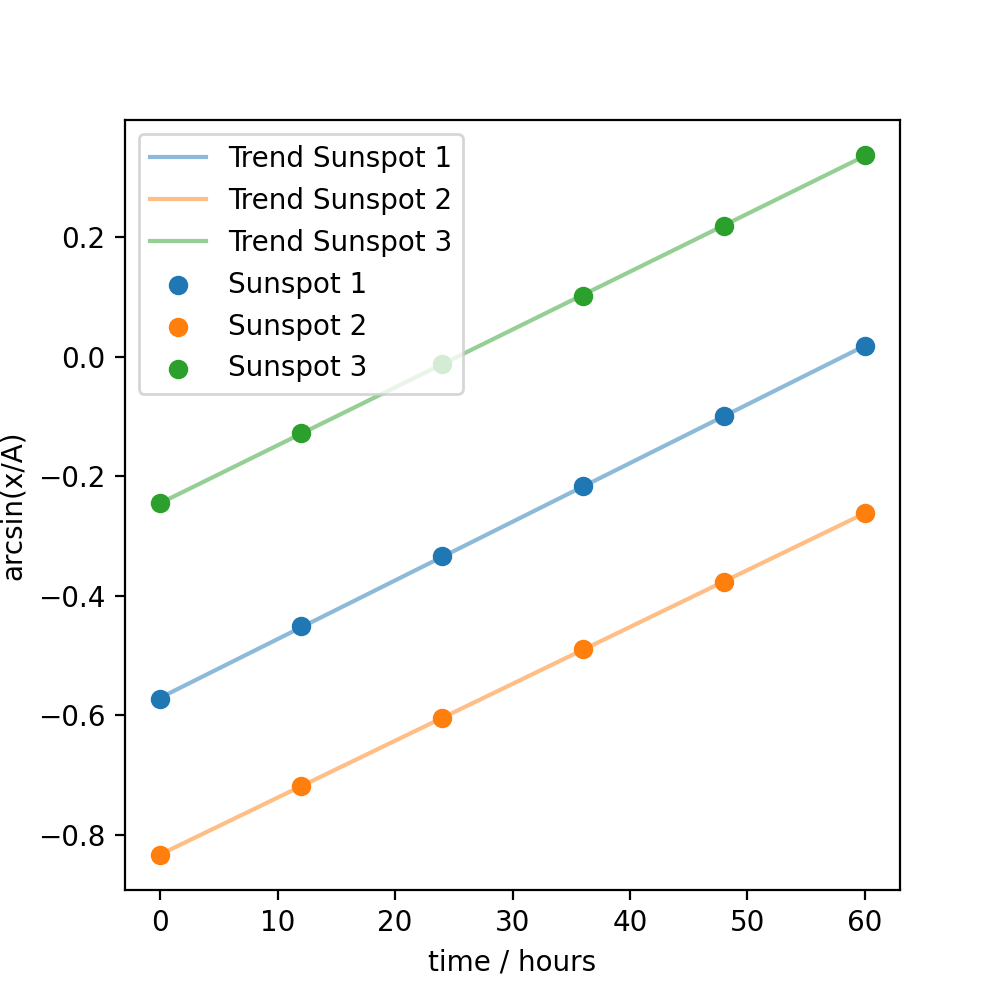

In [15]:
ax1.plot(t, fits[0][0]*t+fits[0][1], label='Trend Sunspot 1', alpha=.5)
ax1.plot(t, fits[1][0]*t+fits[1][1], label='Trend Sunspot 2', alpha=.5)
ax1.plot(t, fits[2][0]*t+fits[2][1], label='Trend Sunspot 3', alpha=.5)
ax1.legend(loc='best')
fig1

Now let's calculate the $T$ values using the gradients and then plot them!

In [16]:
# use the formula T = 2pi/m to calculate the rotation period for each sunspot
# turn it into days by dividing by 24 hours
# Your code here:
T = [np.round(2*np.pi/fit[0]/24,1) for fit in fits]

T

[26.7, 27.5, 27.0]

Great! Now let's make one final plot of time period vs latitude. We can calculate the latitude of each sunspot like this:

In [17]:
lats = [np.round(degrees(np.arcsin((y-512)/512)),1) for y in y_avg]
lats

[6.9, 13.4, -10.1]

<IPython.core.display.Javascript object>


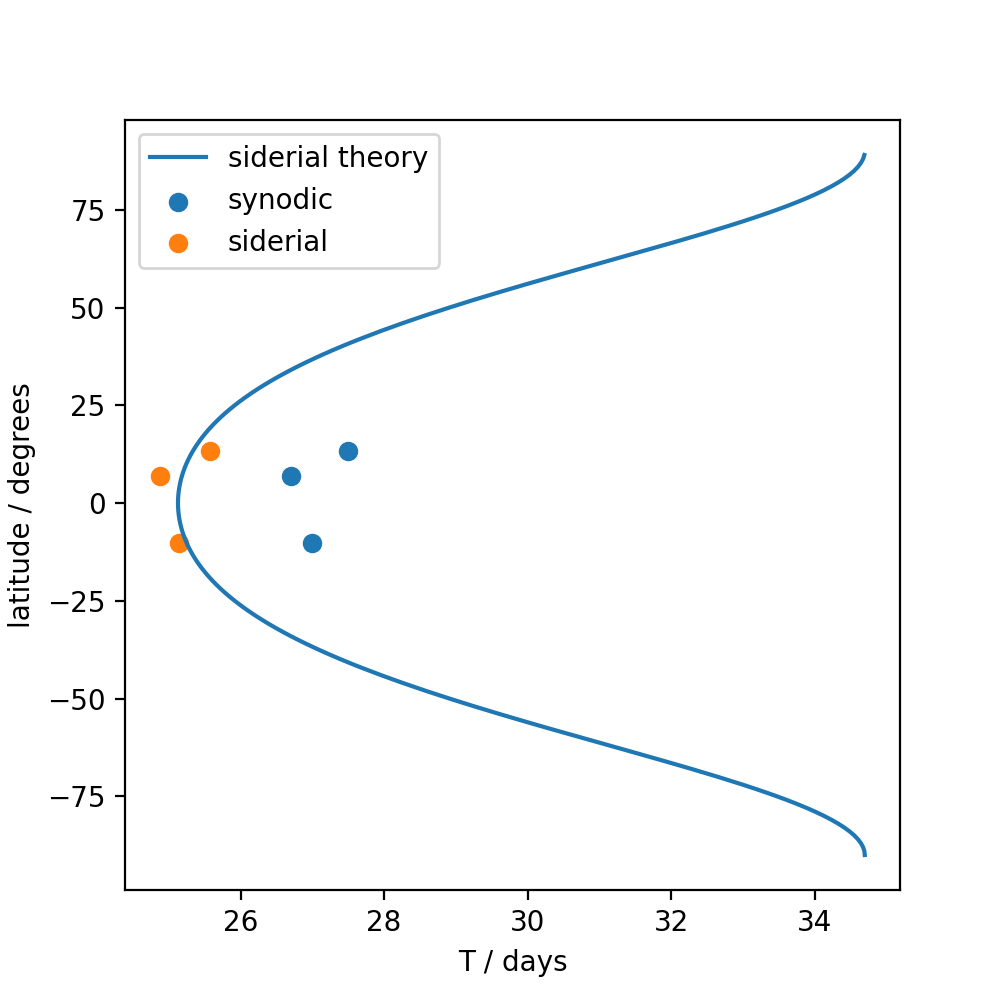

In [18]:
fig2 = plt.figure(num=2, figsize=(5, 5))
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('T / days')
ax2.set_ylabel('latitude / degrees')
ax2.scatter(T, lats, label='synodic')
plt.legend()
fig2

You should see from your image that the sun's rotation period changes with latitude. SunPy can plot the theoretical rotation curve over our data so we can see how close we got to the correct values.

<IPython.core.display.Javascript object>


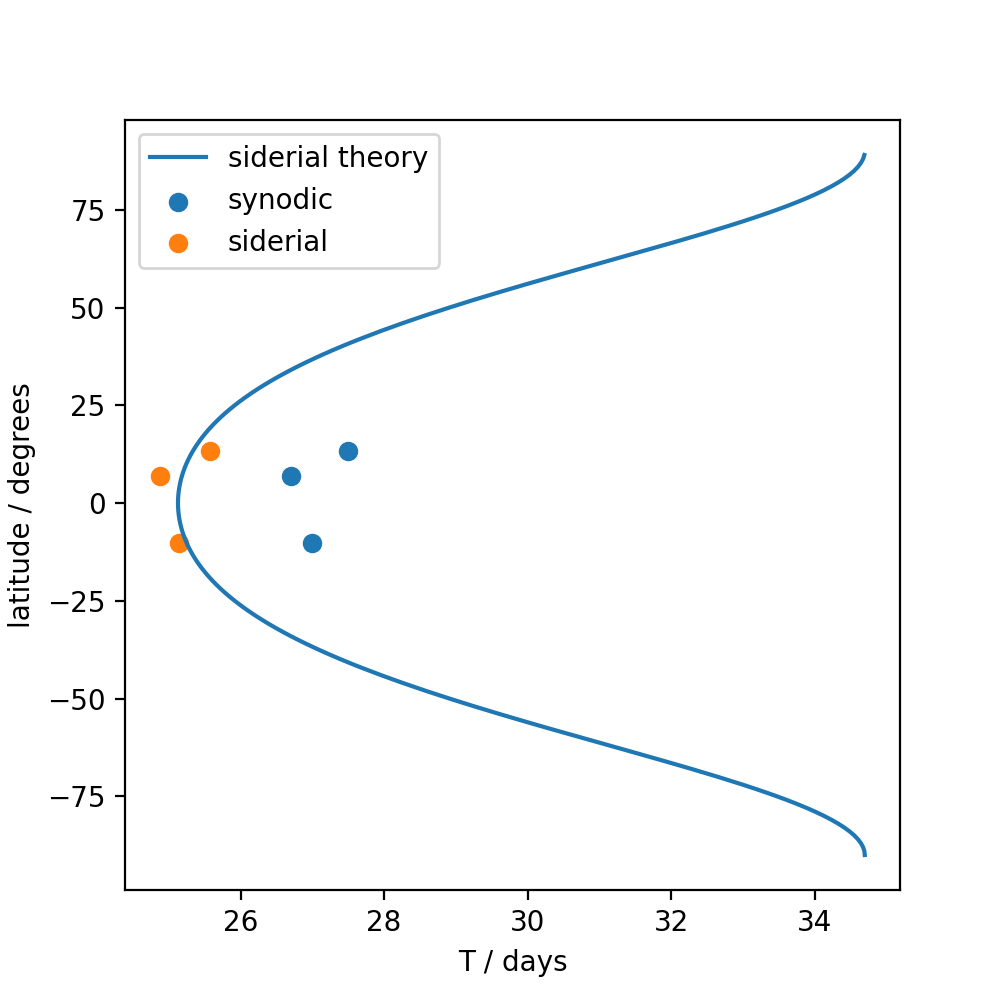

In [19]:
from sunpy.physics.differential_rotation import diff_rot

latitudesTheory = np.arange(-90, 90, 1) * u.deg
dt = 1 * u.day
rotation_rate = [diff_rot(dt, this_lat) / dt for this_lat in latitudesTheory]
rotation_period = [360 * u.deg / this_rate for this_rate in rotation_rate]

convert = 360/365.25
deg_per_day = [360/t + convert for t in T]
Tnew = [360/dpd for dpd in deg_per_day]

ax2.scatter(Tnew, lats, label='siderial')
ax2.plot([this_period.value for this_period in rotation_period], latitudesTheory, label='siderial theory')
plt.legend()
fig2

Notice how in the middle of the sun at 0 degrees the sun rotates fastest, once every 25 days, whereas at the poles it rotates every 36 days. 

You will also notice a new set of markers much closer to the theoretical curve. These time periods have been corrected for the movement of the Earth around its orbit to give us the actual or siderial rotation of the sun whereas the periods we calculated before were synodic periods. The synodic period is the time taken for the feature (sunspot) to return to the same position as viewed from the Earth which itseld is rotating around the sun. The correction factor, how many degrees per day the Earth moves in its orbit, was added to the degrees per day we observed the sunspots moving.

Our data appears to be offset from the theoretical curve in part due to errors from our measurements of the pixel coordinates and errors introduced when resampling.

I suggest you look at the theorySunspots notebook now for an explanation of the equation and the theoretical motion of a sunspot across the solar disk.

Finally the cell below will draw one of the images again. Choose one which has all the sunspots you tracked in it.
In the second cell below there is example code on how to make a rectangle appear on the image. Place a rectangle around all the sunspots you tracked and then use the last code cell to save the image.

<IPython.core.display.Javascript object>


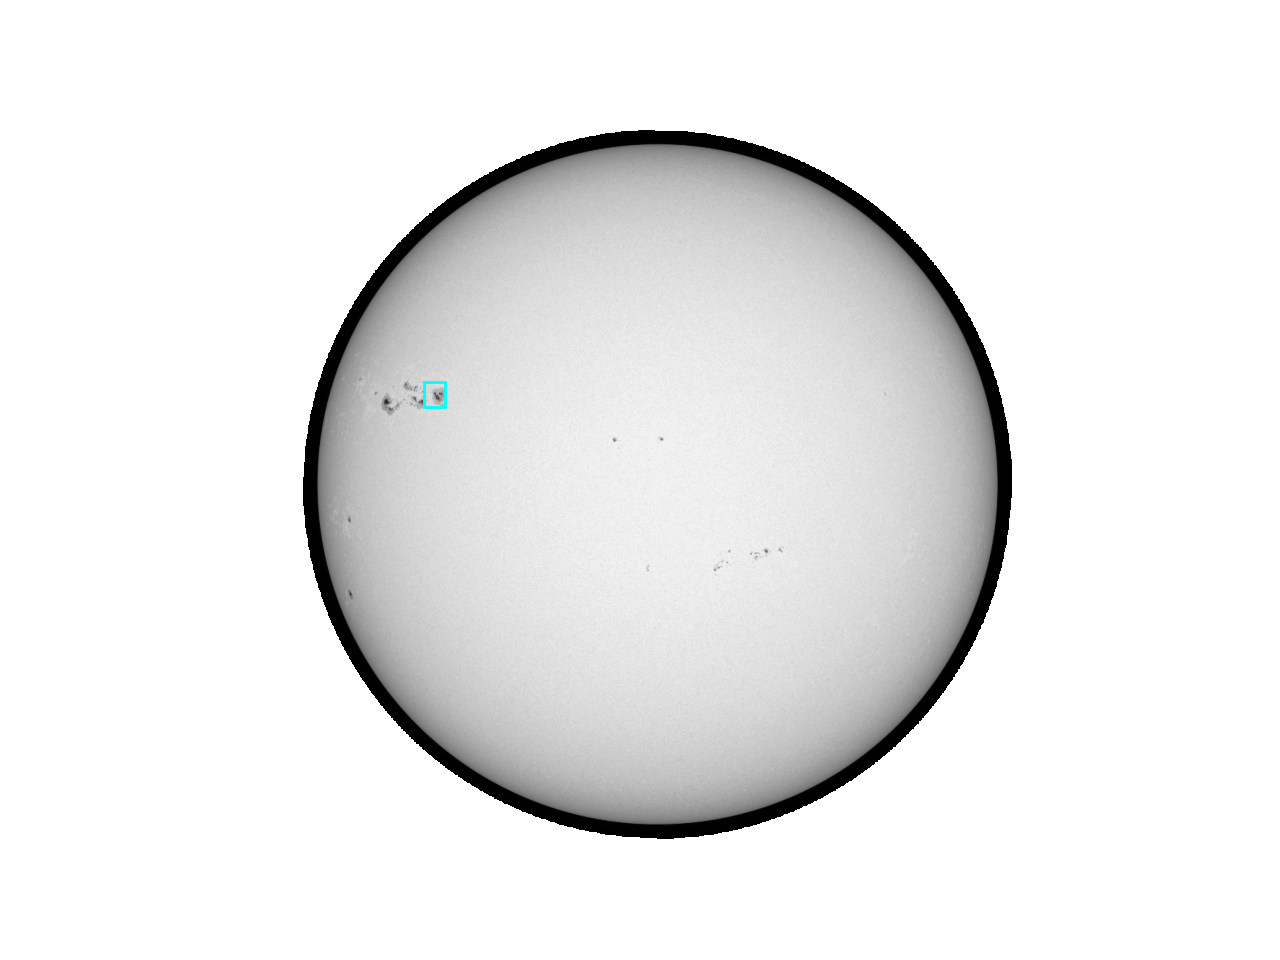

In [24]:
fig3, ax3 = plt.subplots(1)
ax3.imshow(smaps[5].data, cmap='Greys_r', origin='lower')
plt.axis('off')
fig3

<IPython.core.display.Javascript object>


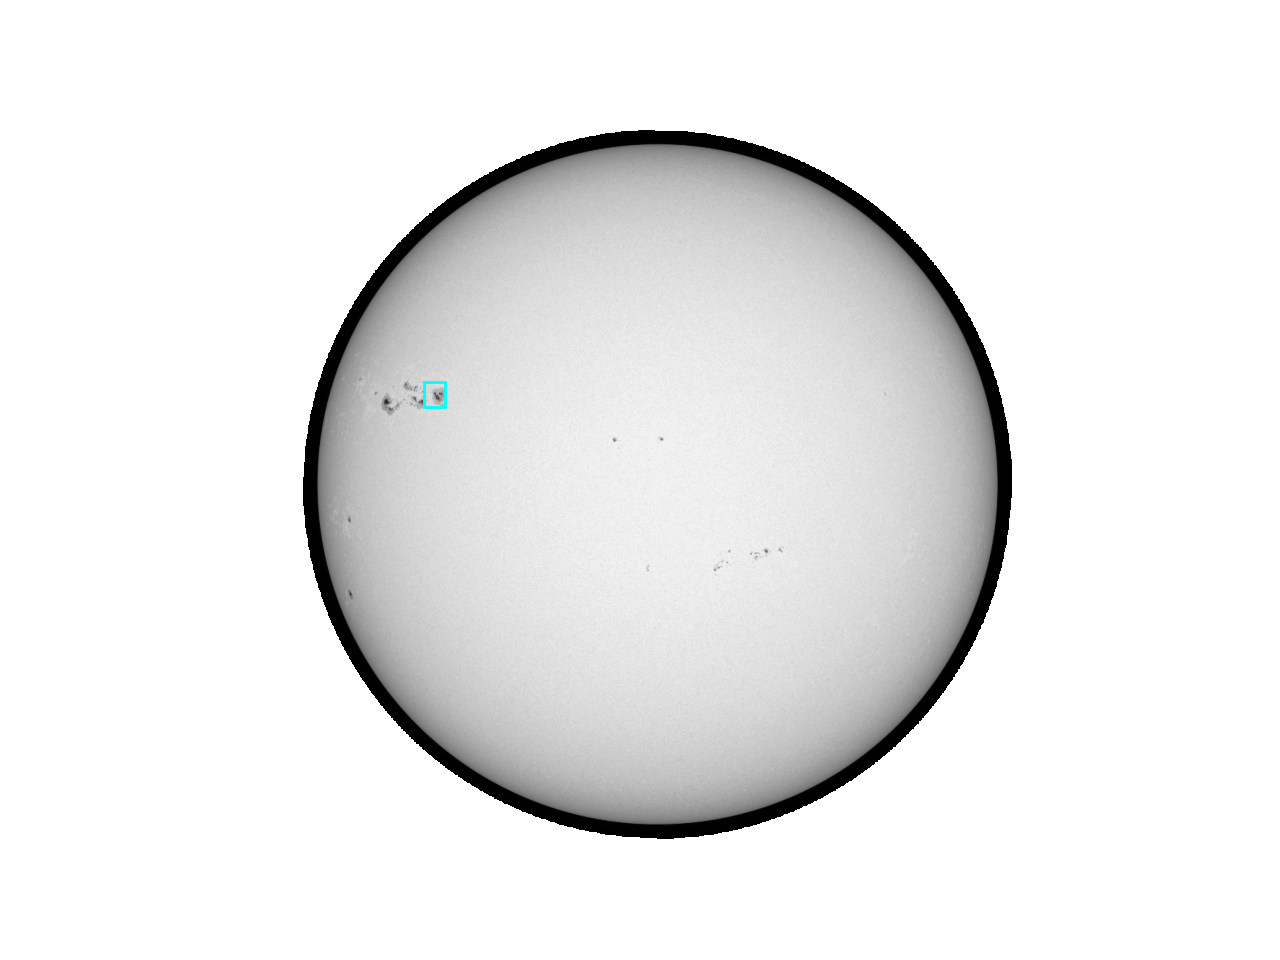

In [25]:
# Adapt this template to put a rectangle around each sunspot you tracked
# you'll need to copy and paste the code twice below in this cell then change the numbers
# Create a Rectangle patch bottom right corner coordinates in the (, ) and width then height
rect = patches.Rectangle((190,620),30,35,linewidth=1,edgecolor='cyan',facecolor='none')
# Add the patch to the Axes
ax3.add_patch(rect)

fig3

In [26]:
plt.savefig('myTrackedSunspots.png', dpi=200)

## Challenge

It would be great if this process was automated! The file ```sunspotsAuto.py``` has my attempt to automate sunspot detection using ```stara.py``` (see references below), scikit-learn and scikit-image which are image and machine learning modules in python.

## References

1) SunPy - Differential Rotation Code - https://docs.sunpy.org/en/stable/generated/gallery/plotting/simple_differential_rotation.html  
2) Stuart Mumford - stara.py - https://github.com/Cadair/sunspot_experiments/blob/master/  
3) scikit-learn - Clustering - https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering  
4) Roša, D., Brajša, R., Vršnak, B. et al. The relation between the synodic and sidereal rotation period of the Sun. Sol Phys 159, 393–398 (1995). https://doi.org/10.1007/BF00686540  
5) scienceinschool - Measuring Solar Rotation - https://www.scienceinschool.org/content/sunspots-rotating-sun